# ANOVA and Chi Square 

### Practice Exercise 1

A company makes three types of electronic device.
Life time in hours for each type of electronic device is given below:

* life_type_A = [ 407, 411, 409 ]
* life_type_B = [ 404, 406, 408, 405, 402 ]
* ife_type_C  = [ 410, 408, 406, 408]

### Hint

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
life_type_A = np.array([407, 411, 409 ])
life_type_B = np.array([404, 406, 408, 405, 402 ])
life_type_C  = np.array([410, 408, 406, 408])

### a)  Write your inferene on the group means from the above boxplots.

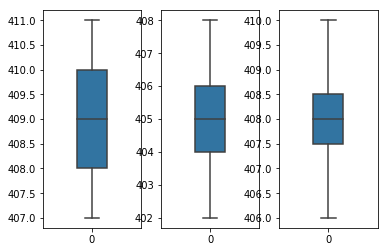

In [7]:
plt.subplot(1,3,1)
sns.boxplot(data=life_type_A, width=0.3)
plt.subplot(1,3,2)
sns.boxplot(data=life_type_B,width=0.3)
plt.subplot(1,3,3)
sns.boxplot(data=life_type_C,width=0.3)

The means of all the 3 data are 409, 405 and 408 respectively.

### b)  At 5% level of significance, is there any difference in the average lifetimes of the three types?

In [8]:
from scipy.stats import f_oneway
f_stat,p_val = f_oneway(life_type_A,life_type_B,life_type_C)
p_val

0.04419417382415922

As the p value is < 0.05 we reject the null hypothesis. Where the null hypothesis was that the avg of type 1 = avg of type 2 = avg of type 3.

### c)  If  you were able to reject the null hypothesis, you can proceed with post-hoc analysis to determine which means are different 

In [9]:
mu1 = np.mean(life_type_A)
mu2 = np.mean(life_type_B)
mu3 = np.mean(life_type_C)
print(mu1,mu2,mu3)

409.0 405.0 408.0


Mean of 1st sample and 3rd sample are almost same and there is a difference in mean of 2nd and the rest of the others.

### Practice Exercise 2

In [10]:
table1  = [['Day','Store-A','Store-B','Store-C','Store-D','Store-E'], [1,69, 71, 64, 67, 56],\
           [2, 68, 76, 79, 87, 76], [3, 71, 77, 74, 84, 72], [4, 70, 73, 71, 78, 73], [5, 60, 64, 67, 79, 58]]

In [11]:

headers = table1.pop(0) #

df1 = pd.DataFrame(table1, columns=headers)
print(df1)

   Day  Store-A  Store-B  Store-C  Store-D  Store-E
0    1       69       71       64       67       56
1    2       68       76       79       87       76
2    3       71       77       74       84       72
3    4       70       73       71       78       73
4    5       60       64       67       79       58


# Is the avg sales same across all the stores

### Here the null hypothesis is that the avg sales of store A = avg sales of Store B = avg sales of Store C = avg sales of Store D = vg sales of Store E

In [14]:
f_stat,p_val = f_oneway(df1['Store-A'],df1['Store-B'],df1['Store-C'],df1['Store-D'],df1['Store-E'])
p_val

0.06981897863436556

# The null hypothesis holds.

# Post - Hoc Analysis

In [19]:
mu1 = df1['Store-A'].mean()
mu2 = df1['Store-B'].mean()
mu3 = df1['Store-C'].mean()
mu4 = df1['Store-D'].mean()
mu5 = df1['Store-E'].mean()
print(mu1,mu2,mu3,mu4,mu5)

67.6 72.2 71.0 79.0 67.0


## Chi Square

### Practice Exercise 3

Refer to the above example 5. Here the operations manager changes his belief and now believes that 28% of their passengers prefer vegan food, 42% prefer vegetarian food , 25% prefer non-veg food 5% request for Jain food. 

At 5% level of significance, can you confirm that the meal preference is as per the belief of the operations manager?

In [21]:
import scipy.stats as stats
import scipy

observed_values    = scipy.array([190, 185, 90, 35])
n                  = observed_values.sum()


In [25]:
expected_val = scipy.array([500*0.28, 500*0.42, 500*0.25, 500*0.05])

In [26]:
from scipy.stats import chisquare
chisquare(observed_values,expected_val)

Power_divergenceResult(statistic=34.63333333333334, pvalue=1.4561004918754443e-07)

# Here the null hypothesis was P of Vegan is 28%, 42% is veg and so on .... and since p<0.05 we reject the null hyp.

### Chi-square tests of independence

### Practice Exercise 4

A Cable service provider company is interested in checking whether or not the customer churn depends on customer segment.  Use 5% as level of significance

| Customer Segment | Churned | Retained |
|  -------- | ----- | ---- |
| S1 | 15 | 142 |
| S2 | 24 | 400 |
| S3 | 30 | 389 |


#### Hint

In [81]:
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
churn_array = np.array([[15,142],[24, 400],[30, 389]])

In [90]:
chi2_contingency(churn_array)

(2.779977047087869, 0.24907816314986156, 2, array([[ 10.833, 146.167],
        [ 29.256, 394.744],
        [ 28.911, 390.089]]))

# Here the p value is > 0.05 hence we fail to reject the null hypothesis

## E N D  